In [1]:
import pandas as pd
import numpy as np
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv('precog/precogdata.csv')

In [3]:
data.head()

,0,1
0,Will donate thrice the number of upvotes (amou...,[R]eddiquette
1,"If you are not moved by this picture, I wish I...",Non-Political
2,Megathread: India-Pakistan border skirmish The...,[R]eddiquette
3,Image Of Smiling Baby For Hyderabad Police Off...,Non-Political
4,"This is India. Funny comments aside, it's act...",Politics


In [4]:
numdict={
    'Politics': 0,
 'Non-Political': 1,
 'AskIndia': 2,
 '[R]eddiquette': 3,
 'Science/Technology': 4,
 'Policy/Economy': 5,
 'Business/Finance': 6,
 'Scheduled': 7,
 'Sports': 8,
 'Food': 9,
 'Photography': 10
}

In [5]:
for i in range(len(data)):
    data.iloc[:,1][i]=numdict[data.iloc[:,1][i]]

In [6]:
data.head()

,0,1
0,Will donate thrice the number of upvotes (amou...,3
1,"If you are not moved by this picture, I wish I...",1
2,Megathread: India-Pakistan border skirmish The...,3
3,Image Of Smiling Baby For Hyderabad Police Off...,1
4,"This is India. Funny comments aside, it's act...",0


In [7]:
data.to_csv('precog/formatdata.csv', sep=',',index=False)

## work on formatted data

In [8]:
data=pd.read_csv('precog/formatdata.csv')

In [9]:
data.head()

,0,1
0,Will donate thrice the number of upvotes (amou...,3
1,"If you are not moved by this picture, I wish I...",1
2,Megathread: India-Pakistan border skirmish The...,3
3,Image Of Smiling Baby For Hyderabad Police Off...,1
4,"This is India. Funny comments aside, it's act...",0


In [10]:
data.replace('\d+', 'NUM', regex=True)

,0,1
0,Will donate thrice the number of upvotes (amou...,3
1,"If you are not moved by this picture, I wish I...",1
2,Megathread: India-Pakistan border skirmish The...,3
3,Image Of Smiling Baby For Hyderabad Police Off...,1
4,"This is India. Funny comments aside, it's act...",0
5,No Yoga and Yoga. Difference Did they play me...,0
6,"Help, ideas needed. HLL poisoned my village wi...",3
7,"An Indian woman, a Japanese woman, and a Syria...",1
8,Incredible India. Where do these tourists alw...,1
9,My friend passed away and TOI made a mockery o...,3


# Dump data to a MongoDB instance

In [ ]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [ ]:
db = client['test-database']
collection = db['test-collection']


In [ ]:
postdata=[]
for i in range(len(data)):
    postdata.append({'data':data.iloc[:,0][i],'class':str(data.iloc[:,1][i])})

In [ ]:
postdata[0]

In [ ]:
posts = db.posts
result = posts.insert_many(postdata)
result.inserted_ids

# Vectorizing Text Data

In [ ]:
cv=CountVectorizer(stop_words=stopwords.words("english"), analyzer='word',max_features=1000,token_pattern=r'\b[^\d\W]+\b')

In [ ]:
x=cv.fit_transform(data.iloc[:,0])

In [ ]:
len(cv.get_feature_names()),cv.get_feature_names()

In [ ]:
cv.vocabulary_

In [ ]:
len(x.toarray()[0])

In [ ]:
tf=TfidfTransformer()

In [ ]:
tfx=tf.fit_transform(x)

In [ ]:
tfx.toarray()

# SVM Classifier

In [ ]:
clf=LinearSVC()

In [ ]:
clf.fit(tfx,data.iloc[:,1])

In [ ]:
clf.score(tfx,data.iloc[:,1])

In [ ]:
clf.predict(tfx)

# TF-IDF

In [11]:
idf=TfidfVectorizer(stop_words=stopwords.words("english"), analyzer='word',max_features=1000,token_pattern=r'\b[^\d\W]+\b')

In [12]:
xdf=idf.fit_transform(data.iloc[:,0])

In [ ]:
clf.fit(xdf,data.iloc[:,0])

In [ ]:
clf.score(xdf,data.iloc[:,0])

# train test split 

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(data.iloc[:,0],data.iloc[:,1],test_size=0.15, random_state=1)

In [14]:
xdftrain=idf.fit_transform(xtrain)
xdftest=idf.fit_transform(xtest)

In [ ]:
clf.fit(xdftrain,ytrain)

In [ ]:
clf.score(xdftest,ytest)

In [ ]:
xdftrain.shape , xdftest.shape

 # naive bayes 

In [ ]:
clf2=GaussianNB()

In [ ]:
clf2.fit(xdftrain.toarray(),ytrain)

In [ ]:
clf2.score(xdftest.toarray(),ytest)

# dense neural network

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Dense(512, input_shape=(1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(11))
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
nn = model.fit(xdftrain, utils.to_categorical(ytrain, 11),
                    batch_size=30,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)

In [ ]:
score = model.evaluate(xdftest,utils.to_categorical(ytest, 11),
                       batch_size=30, verbose=1)
score

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                5643      
_________________________________________________________________
activation_2 (Activation)    (None, 11)                0         
Total params: 518,155
Trainable params: 518,155
Non-trainable params: 0
_________________________________________________________________


# Summarizing results for different models on tf-idf data

In [19]:
data1=[]
data2=[]
datann=[]
clf1=LinearSVC()
clf2=GaussianNB()
for i in range(1,8):
    xtr=xdftrain[0:i*100]
    ytr=ytrain[0:i*100]
    clf1.fit(xtr,ytr)
    clf2.fit(xtr.toarray(),ytr)
    model.fit(xtr, utils.to_categorical(ytr, 11),
                    batch_size=30,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)
    
    data1.append(clf1.score(xdftest,ytest))
    data2.append(clf2.score(xdftest.toarray(),ytest))
    datann.append(model.evaluate(xdftest,utils.to_categorical(ytest, 11),
                       batch_size=10, verbose=1)[1])
    
    
    

Train on 90 samples, validate on 10 samples
Epoch 1/20
90/90 [==============================] - 0s 4ms/step - loss: 2.3554 - acc: 0.3444 - val_loss: 2.2026 - val_acc: 0.8000
Epoch 2/20
90/90 [==============================] - 0s 442us/step - loss: 2.1786 - acc: 0.5556 - val_loss: 2.0028 - val_acc: 0.8000
Epoch 3/20
90/90 [==============================] - 0s 510us/step - loss: 2.0097 - acc: 0.5667 - val_loss: 1.7820 - val_acc: 0.8000
Epoch 4/20
90/90 [==============================] - 0s 472us/step - loss: 1.8106 - acc: 0.5444 - val_loss: 1.5542 - val_acc: 0.8000
Epoch 5/20
90/90 [==============================] - 0s 451us/step - loss: 1.6591 - acc: 0.5444 - val_loss: 1.3304 - val_acc: 0.8000
Epoch 6/20
90/90 [==============================] - 0s 374us/step - loss: 1.4724 - acc: 0.5556 - val_loss: 1.1360 - val_acc: 0.8000
Epoch 7/20
90/90 [==============================] - 0s 461us/step - loss: 1.3273 - acc: 0.5667 - val_loss: 0.9884 - val_acc: 0.8000
Epoch 8/20
90/90 [================

142/142 [==============================] - 0s 280us/step
Train on 360 samples, validate on 40 samples
Epoch 1/20
360/360 [==============================] - 0s 403us/step - loss: 0.2502 - acc: 0.9361 - val_loss: 1.1950 - val_acc: 0.6500
Epoch 2/20
360/360 [==============================] - 0s 456us/step - loss: 0.1753 - acc: 0.9500 - val_loss: 1.1840 - val_acc: 0.6500
Epoch 3/20
360/360 [==============================] - 0s 444us/step - loss: 0.1145 - acc: 0.9667 - val_loss: 1.1847 - val_acc: 0.6500
Epoch 4/20
360/360 [==============================] - 0s 418us/step - loss: 0.0920 - acc: 0.9778 - val_loss: 1.1851 - val_acc: 0.6500
Epoch 5/20
360/360 [==============================] - 0s 400us/step - loss: 0.0588 - acc: 0.9861 - val_loss: 1.2016 - val_acc: 0.6500
Epoch 6/20
360/360 [==============================] - 0s 419us/step - loss: 0.0488 - acc: 0.9917 - val_loss: 1.2080 - val_acc: 0.6500
Epoch 7/20
360/360 [==============================] - 0s 395us/step - loss: 0.0398 - acc: 0.99

Epoch 19/20
540/540 [==============================] - 0s 397us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 1.7461 - val_acc: 0.6667
Epoch 20/20
142/142 [==============================] - 0s 243us/step
Train on 630 samples, validate on 70 samples
Epoch 1/20
630/630 [==============================] - 0s 371us/step - loss: 0.2230 - acc: 0.9508 - val_loss: 1.9103 - val_acc: 0.6429
Epoch 2/20
630/630 [==============================] - 0s 369us/step - loss: 0.1032 - acc: 0.9746 - val_loss: 1.7730 - val_acc: 0.6429
Epoch 3/20
630/630 [==============================] - 0s 424us/step - loss: 0.0543 - acc: 0.9921 - val_loss: 1.8496 - val_acc: 0.6429
Epoch 4/20
630/630 [==============================] - 0s 420us/step - loss: 0.0344 - acc: 0.9921 - val_loss: 1.8787 - val_acc: 0.6571
Epoch 5/20
630/630 [==============================] - 0s 390us/step - loss: 0.0267 - acc: 0.9937 - val_loss: 1.8872 - val_acc: 0.6286
Epoch 6/20
630/630 [==============================] - 0s 378us/step - loss: 0.017

In [20]:
import matplotlib.pyplot as plt

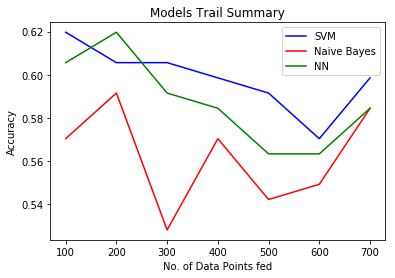

In [31]:
plt.plot([100,200,300,400,500,600,700],data1,color='b')
plt.plot([100,200,300,400,500,600,700],data2,color='r')
plt.plot([100,200,300,400,500,600,700],datann,color='g')
plt.gca().legend(('SVM','Naive Bayes','NN'))
plt.xlabel('No. of Data Points fed')
plt.ylabel('Accuracy')
plt.title('Models Trail Summary')
plt.show()

## Clearly SVM is performing much better and with more data points the graph will grow more

# Final Training of SVM Model with the whole data via TF-IDF

In [22]:
tok=TfidfVectorizer(stop_words=stopwords.words("english"), analyzer='word',max_features=1000,token_pattern=r'\b[^\d\W]+\b')

In [23]:
X=tok.fit_transform(data.iloc[:,0])
Y=data.iloc[:,1]

In [24]:
classifier=LinearSVC()
classifier.fit(X,Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### making a pickle dump of the model to be used in the webapp

In [25]:
import pickle

In [28]:
file=open('precog/model.obj','wb')
pickle.dump(classifier,file)